In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
# To save models
import math
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [75]:
df = pd.read_csv("/workspaces/betaniammc-machine-learning/data/processed/df_diabetes")

## modelo del modelo 1

In [76]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [77]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Una vez que el modelo se ha entrenado correctamente, podemos visualizar el árbol con la misma librería. Esta visualización representa todos los pasos que ha seguido el modelo hasta la construcción del árbol. Además, se hace por niveles y de izquierda a derecha:

### visualizacion del arbol

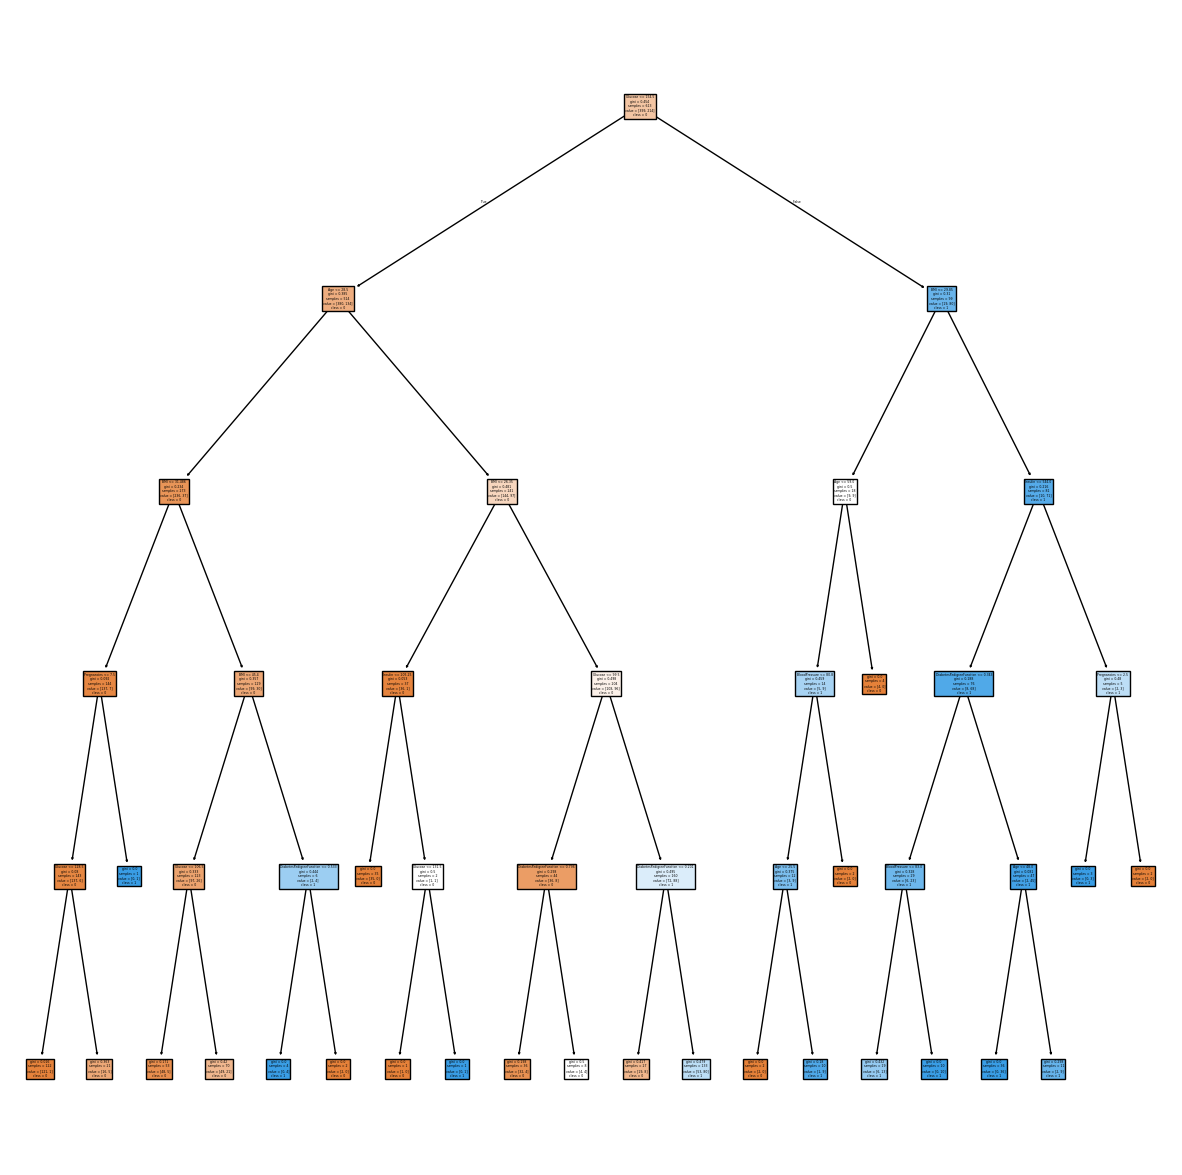

In [78]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

### Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [79]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)


Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la precisión (accuracy), que es la fracción de predicciones que el modelo realizó correctamente.

In [80]:
accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7727272727272727, 0.8205546492659054)

In [81]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = { 'max_depth': [4, 5, 6,7],
                'min_samples_split': [2, 5,8 , 10],
                'min_samples_leaf': [1, 2, 4]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(DecisionTreeClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [82]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8, random_state=18)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7792207792207793, 0.8107667210440457)

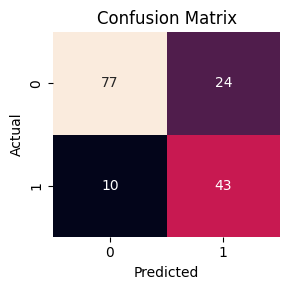

In [ ]:
caso_diabetes = confusion_matrix(y_test, y_pred_test)

# Dibujaremos esta matriz para hacerla más visual
df_cm = pd.DataFrame(banco_ingreso)

plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

para la prueba con criterior=gini se obtiene
el modelo ha predicho correctamente 77 negativos
el modelo ha predicho erroneamente 10 negativos que en realidad eran verdaderos
el modelo ha predicho correctamente 43 posivos
el modelo ha predicho erroneamente 24 positivos que en realidad eran negativos


# pruebas con criterior = entropy


In [84]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = { 
                'criterion' : ["entropy"],
                'max_depth': [4, 5, 6,7],
                'min_samples_split': [2, 5,8 , 10],
                'min_samples_leaf': [1, 2, 4]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(DecisionTreeClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [85]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=18)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7987012987012987, 0.797716150081566)

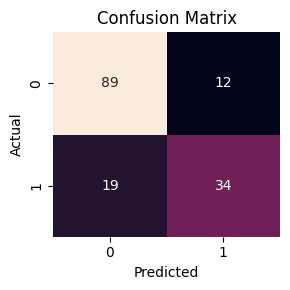

In [ ]:
caso_diabetes = confusion_matrix(y_test, y_pred_test)

# Dibujaremos esta matriz para hacerla más visual
df_cm = pd.DataFrame(banco_ingreso)

plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

para la prueba con criterior=entropy se obtiene
el modelo ha predicho correctamente 89 negativos
el modelo ha predicho erroneamente 19 negativos que en realidad eran verdaderos
el modelo ha predicho correctamente 34 posivos
el modelo ha predicho erroneamente 12 positivos que en realidad eran negativos

# pruebas con criterior = log_loss

In [91]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = { 
                'criterion' : ["log_loss"],
                'max_depth': [4, 5, 6,7],
                'min_samples_split': [2, 5,8 , 10],
                'min_samples_leaf': [1, 2, 4]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(DecisionTreeClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'criterion': 'log_loss',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [92]:
model = DecisionTreeClassifier(criterion="log_loss", max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=18)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7987012987012987, 0.797716150081566)

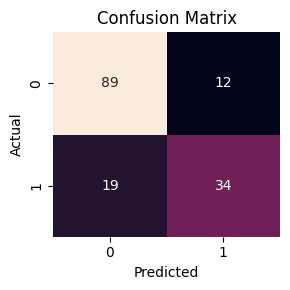

In [ ]:
caso_diabetes = confusion_matrix(y_test, y_pred_test)

# Dibujaremos esta matriz para hacerla más visual
df_cm = pd.DataFrame(banco_ingreso)

plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


para la prueba con criterior=log_loss al igual  que la anterior se obtiene:

el modelo ha predicho correctamente 89 negativos

el modelo ha predicho erroneamente 19 negativos que en realidad eran verdaderos

el modelo ha predicho correctamente 34 posivos

el modelo ha predicho erroneamente 12 positivos que en realidad eran negativos



# Conclusion:

La prueba con valor en gini aunque tiene un valor de porcentaje menor que el las otras dos pruebas, podemos observar que al hacer la matriz de confusion esta nos arrrojas mayores valores acertados para los casos positivos de diabetes (43) frente a los 34 obtenidos en las otras dos pruebas, tambien ha predicho erroneamente solo 10 casos como negativos que realmente eran positivos frente a los 19 que ha predecido erroneamente las otras dos pruebas.

en este tipo de estudio es preferible obtener resultados donde sean mas acertados los casos de diabetes ya que es preferible tener un falso posivo y analizar a personas que no tienen la enfermedad, ante la prediccion erronea de falsos negativos en donde se dejan por fuera a las personas que realmente tienen la enfermedad.

por tal motivo se toma como aceptable el modelo con criterior = gini

In [94]:
with open("/workspaces/betaniammc-machine-learning/models/diabetes_decitions_model.pkl", "wb") as file:
    pickle.dump(model, file)